In [75]:
import numpy as np
from strawberryfields.apps import data, sample, subgraph, plot
import plotly

import networkx as nx


# Generate the Random Graph 

In [80]:
def get_clustered_graph():
    import random 
    # Generate a random graph
    G = nx.union(nx.union(nx.erdos_renyi_graph(8, 0.95), nx.erdos_renyi_graph(8, 0.95), rename=('G0-', 'G1-')), nx.union(nx.erdos_renyi_graph(8, 0.95), nx.erdos_renyi_graph(8, 0.95), rename=('G2-', 'G3-')))

    # List of nodes
    nodes = list(G.nodes())

    count = 0
    while count < 7:
        i = random.randint(0, len(nodes)-1)
        j = random.randint(0, len(nodes)-1)

        if i != j and not (nodes[i], nodes[j]) in G.edges:
            G.add_edge(nodes[i], nodes[j])
            count += 1

    # adding random weight to edges:
    for e in G.edges:
        G[e[0]][e[1]]['weight'] = random.random()
        if e[0][:2] != e[1][:2]:
            G[e[0]][e[1]]['weight'] += 1
            G[e[0]][e[1]]['weight'] *= 100

        G[e[0]][e[1]]['inverse_weight'] = 1/G[e[0]][e[1]]['weight']

        
    return G

    # total_pos = nx.spring_layout(G, pos=nx.spectral_layout(G), weight='inverse_weight', k=2)

In [98]:
def get_clustered_graph_unlabelled():
    import random 
    # Generate a random graph
    
    G = nx.disjoint_union(nx.disjoint_union(nx.erdos_renyi_graph(8, 0.95), nx.erdos_renyi_graph(8, 0.95)), nx.disjoint_union(nx.erdos_renyi_graph(8, 0.95), nx.erdos_renyi_graph(8, 0.95)))

    # List of nodes
    nodes = list(G.nodes())

    count = 0
    while count < 7:
        i = random.randint(0, len(nodes)-1)
        j = random.randint(0, len(nodes)-1)

        if i != j and not (nodes[i], nodes[j]) in G.edges:
            G.add_edge(nodes[i], nodes[j])
            count += 1

    # adding random weight to edges:
    for e in G.edges:
        G[e[0]][e[1]]['weight'] = random.random()
        if e[0] != e[1]:
            G[e[0]][e[1]]['weight'] += 1
            G[e[0]][e[1]]['weight'] *= 100

        G[e[0]][e[1]]['inverse_weight'] = 1/G[e[0]][e[1]]['weight']
        
    return G

    # total_pos = nx.spring_layout(G, pos=nx.spectral_layout(G), weight='inverse_weight', k=2)

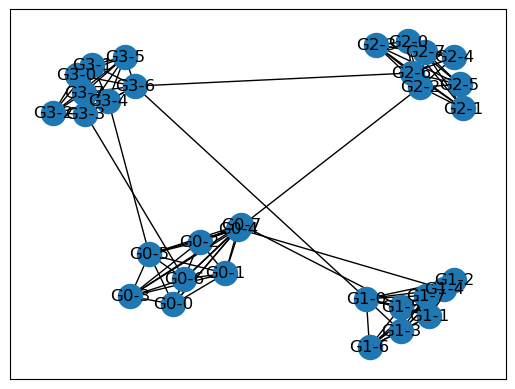

In [99]:
G = get_clustered_graph()
total_pos = nx.spring_layout(G, pos=nx.spectral_layout(G), weight='inverse_weight', k=2)
nx.draw_networkx(G, pos = total_pos)


In [100]:
G_ul = get_clustered_graph_unlabelled()

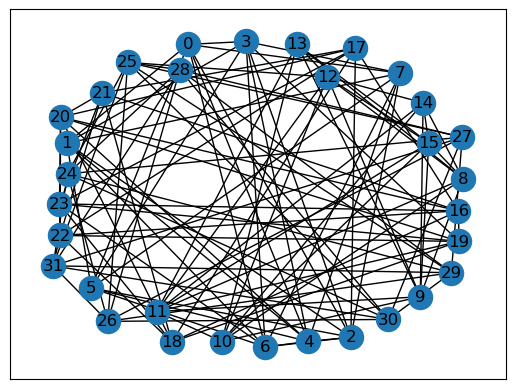

In [101]:
total_pos = nx.spring_layout(G_ul, pos=nx.spectral_layout(G), weight='inverse_weight', k=2)
nx.draw_networkx(G_ul, pos = total_pos)


In [105]:
# adjacnecy matrix
graph_array = nx.to_numpy_array(G_ul)

samples = sample.sample(graph_array, 3, n_samples = 100)

# # For each of the samples, create an adjacency matrix
# adjacency_matrices = []
# for sample in samples:
#     # convert to adjacency matrix
#     sample.

print(samples)


# samples = sample.postselect(samples, 5, 8)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 

In [96]:
print(len(samples))
print(samples)

100
[[0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0,

## Generate the subgraphs from the samples

In [61]:
 # print only the densest subgraph of each size

In [106]:
# convert to subgraphs
subgraphs = sample.to_subgraphs(samples, G_ul)

quantum_subgraphs = []
for graph in subgraphs:
    if graph:
        quantum_subgraphs.append(G_ul.subgraph(graph))

In [107]:
postselected = sample.postselect(samples, 2, 4)
samples_2 = sample.to_subgraphs(postselected,G_ul)
print(samples_2)
forward_mapping , backward_mapping = {}, {}
mapping_list = {i : {'forward' : {}, 'backward' : {}} for i in range(len(samples_2)) }

new_samples_2 = []
for id_s, subgraph_i in enumerate(samples_2):
    sub_list = []
    for i, node_label in enumerate(subgraph_i):
        mapping_list[id_s]['forward'][node_label] = i
        sub_list.append(i) 
        mapping_list[id_s]['backward'][i] = node_label
    new_samples_2.append(sub_list)

[[16, 21], [8, 11], [0, 5], [0, 3], [8, 25, 10, 12], [0, 1, 10, 15], [17, 23], [17, 10, 14, 22], [8, 24, 26, 14], [17, 27, 20, 29], [9, 15], [8, 13, 6, 23], [2, 7], [0, 6], [20, 22], [11, 15], [8, 15], [3, 7], [1, 3], [21, 23], [9, 10], [25, 30], [12, 14], [9, 13], [10, 13], [6, 7], [25, 4, 29, 7], [16, 17, 18, 23], [24, 29], [25, 27, 12, 31], [18, 19, 20, 22], [20, 21], [1, 3, 6], [4, 20, 6, 23], [18, 26, 20, 31], [26, 28, 29, 30], [8, 13], [5, 7], [2, 19, 20, 5], [8, 10], [27, 30], [9, 15], [18, 10, 11, 23], [8, 15], [3, 4], [20, 23], [25, 30], [3, 20, 21, 6], [9, 14], [25, 26, 28, 30], [18, 20, 22, 23], [19, 24, 11, 27]]


In [108]:
dense = subgraph.search(new_samples_2, G_ul, 1, 8)  # we look at top 3 densest subgraphs
print(dense)

{2: [(1.0, [2, 3]), (1.0, [1, 3]), (1.0, [1, 2]), (1.0, [0, 3]), (1.0, [0, 2]), (1.0, [0, 1])], 3: [(1.0, [1, 2, 3]), (1.0, [0, 2, 3]), (1.0, [0, 1, 7]), (1.0, [0, 1, 6]), (1.0, [0, 1, 5]), (1.0, [0, 1, 4]), (1.0, [0, 1, 3]), (1.0, [0, 1, 2])], 4: [(1.0, [0, 1, 6, 7]), (1.0, [0, 1, 4, 7]), (1.0, [0, 1, 4, 6]), (1.0, [0, 1, 4, 5]), (1.0, [0, 1, 3, 7]), (1.0, [0, 1, 3, 6]), (1.0, [0, 1, 3, 5]), (1.0, [0, 1, 3, 4]), (1.0, [0, 1, 2, 7]), (1.0, [0, 1, 2, 3])], 5: [(1.0, [0, 1, 4, 6, 7]), (1.0, [0, 1, 4, 5, 7]), (1.0, [0, 1, 4, 5, 6]), (1.0, [0, 1, 3, 5, 7]), (1.0, [0, 1, 3, 5, 6]), (1.0, [0, 1, 3, 4, 7]), (1.0, [0, 1, 3, 4, 5]), (1.0, [0, 1, 2, 6, 7]), (1.0, [0, 1, 2, 5, 6]), (1.0, [0, 1, 2, 3, 6])], 6: [(1.0, [0, 1, 3, 5, 6, 7]), (1.0, [0, 1, 3, 4, 5, 6]), (1.0, [0, 1, 2, 5, 6, 7]), (1.0, [0, 1, 2, 4, 6, 7]), (1.0, [0, 1, 2, 4, 5, 7]), (1.0, [0, 1, 2, 4, 5, 6]), (1.0, [0, 1, 2, 3, 6, 7]), (1.0, [0, 1, 2, 3, 5, 7]), (1.0, [0, 1, 2, 3, 5, 6]), (1.0, [0, 1, 2, 3, 4, 7])], 7: [(1.0, [0, 1, 3, 

In [115]:
plot.graph(G_ul, dense[8][0][1])

In [111]:
final_graphs = []
# filter out graphs which are not in the same city
for graph in quantum_subgraphs:
    # we need to ONLY have graphs which have nodes with the 
    # same prefix i.e. in the same city 
    nodes = list(graph.nodes()) 
    prefix_set = set([node[:2] for node in nodes])
    print(prefix_set)
    # print(prefix_set)
    if len(prefix_set) != 1:
        final_graphs.append(graph)

{'G1', 'G2'}
{'G2', 'G1', 'G0'}
{'G3', 'G2'}


In [ ]:
len(final_graphs)  

38

In [ ]:
from qtsp import (
    run_tsp_on_simulator,
    sample_graph_with_weights,
    run_tsp_on_hardware,
    add_missing_edges,
) 

In [ ]:
clique_quantum_subgraphs = [add_missing_edges(graph.copy()) for graph in quantum_subgraphs]

[('G3-5', 'G1-6', 10000.0), ('G3-5', 'G0-1', 10000.0), ('G1-6', 'G0-5', 10000.0)]
[('G3-5', 'G1-1', 10000.0), ('G3-5', 'G3-7', 10000.0), ('G0-5', 'G1-1', 10000.0), ('G0-5', 'G3-7', 10000.0)]
[('G3-5', 'G1-6', 10000.0), ('G3-5', 'G0-1', 10000.0), ('G1-6', 'G0-5', 10000.0)]
[]


## Using the Quantum TSP for finding routes in sub-graph

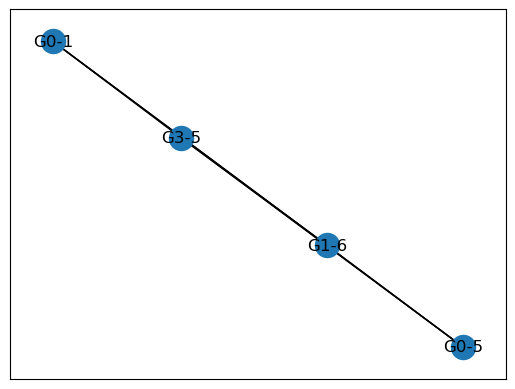

In [ ]:
nx.draw_networkx(clique_quantum_subgraphs[0])

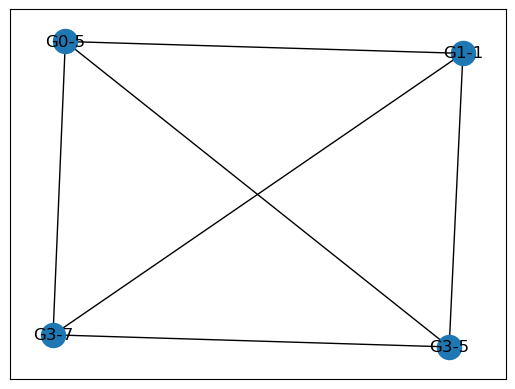

In [ ]:
nx.draw_networkx(clique_quantum_subgraphs[1])

In [ ]:
cycles = []
for i, curr_graph in enumerate(clique_quantum_subgraphs):
    print(f"Solving for the subgraph {i}")
    # we need to remap the nodes to meet the requirements of 
    # the qubo formulation 
    
    
    # make maps for the nodes
    forward_mapping , backward_mapping = {}, {}
    for i, node_label in enumerate(list(curr_graph.nodes())):
        forward_mapping[node_label] = i 
        backward_mapping[i] = node_label
    
    # relabel the nodes
    relabelled_graph = nx.relabel_nodes(curr_graph, forward_mapping)
    
    # run on simulator
    node_list, result = run_tsp_on_simulator(relabelled_graph)
    
    # get the final route in terms of original nodes
    route = [backward_mapping[node] for node in node_list]
    route.append(route[0])
    cycles.append(route)
    print(f"Route for given sub-graph : {route}")

Solving for the subgraph 0
Problem name: TSP

Minimize
  198.74177279377142*x_0_0*x_1_1 + 198.74177279377142*x_0_0*x_1_3
  + 10000*x_0_0*x_2_1 + 10000*x_0_0*x_2_3 + 10000*x_0_0*x_3_1
  + 10000*x_0_0*x_3_3 + 198.74177279377142*x_0_1*x_1_0
  + 198.74177279377142*x_0_1*x_1_2 + 10000*x_0_1*x_2_0 + 10000*x_0_1*x_2_2
  + 10000*x_0_1*x_3_0 + 10000*x_0_1*x_3_2 + 198.74177279377142*x_0_2*x_1_1
  + 198.74177279377142*x_0_2*x_1_3 + 10000*x_0_2*x_2_1 + 10000*x_0_2*x_2_3
  + 10000*x_0_2*x_3_1 + 10000*x_0_2*x_3_3 + 198.74177279377142*x_0_3*x_1_0
  + 198.74177279377142*x_0_3*x_1_2 + 10000*x_0_3*x_2_0 + 10000*x_0_3*x_2_2
  + 10000*x_0_3*x_3_0 + 10000*x_0_3*x_3_2 + 0.4391257445147373*x_1_0*x_2_1
  + 0.4391257445147373*x_1_0*x_2_3 + 10000*x_1_0*x_3_1 + 10000*x_1_0*x_3_3
  + 0.4391257445147373*x_1_1*x_2_0 + 0.4391257445147373*x_1_1*x_2_2
  + 10000*x_1_1*x_3_0 + 10000*x_1_1*x_3_2 + 0.4391257445147373*x_1_2*x_2_1
  + 0.4391257445147373*x_1_2*x_2_3 + 10000*x_1_2*x_3_1 + 10000*x_1_2*x_3_3
  + 0.4391257445147

Cycle : ['G1-6', 'G3-5', 'G0-5', 'G0-1', 'G1-6']
Cycle : ['G3-7', 'G1-1', 'G3-5', 'G0-5', 'G3-7']
Cycle : ['G1-6', 'G3-5', 'G0-5', 'G0-1', 'G1-6']
Cycle : ['G2-4', 'G3-6', 'G2-4']


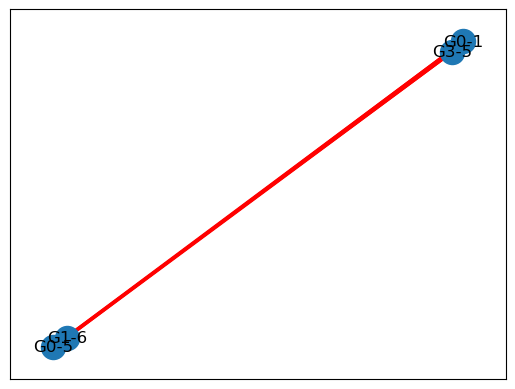

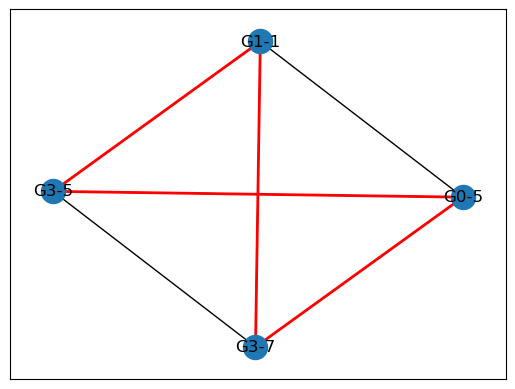

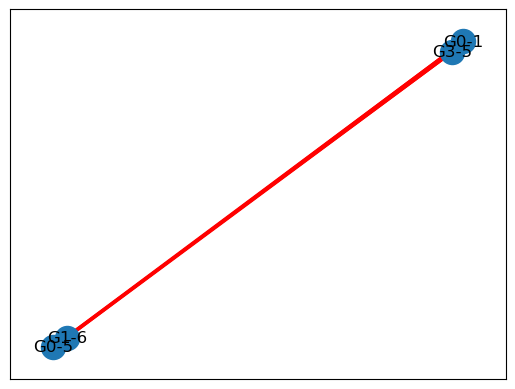

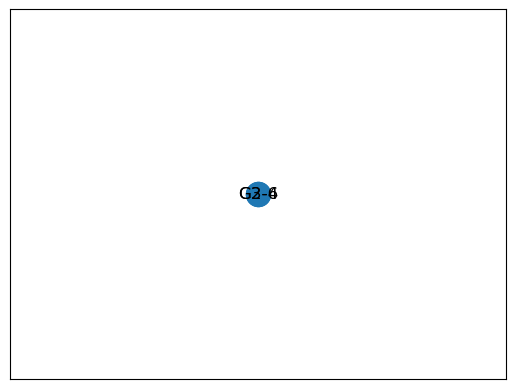

In [ ]:
import matplotlib.pyplot as plt 
for i,G_aux in enumerate(clique_quantum_subgraphs):
  plt.figure(i)
  pos = nx.spring_layout(G_aux, pos=nx.spectral_layout(G_aux))
  cycle = cycles[i]

  _ = nx.draw_networkx(G_aux, pos)
  path_edges = list(zip(cycle,cycle[1:]))
  _ = nx.draw_networkx_edges(G_aux,pos,edgelist=path_edges,edge_color='r', width=2)

  # cost = sum(G[n][nbr]["weight"] for n, nbr in nx.utils.pairwise(cycle))
  print('Cycle :', cycle)


In [ ]:
cycles 

[['G1-6', 'G3-5', 'G0-5', 'G0-1', 'G1-6'],
 ['G3-7', 'G1-1', 'G3-5', 'G0-5', 'G3-7'],
 ['G1-6', 'G3-5', 'G0-5', 'G0-1', 'G1-6'],
 ['G2-4', 'G3-6', 'G2-4']]

## Construct the intercity graph 
- it is trying to form based on those 4 clusters but NOT the ones which we have detected

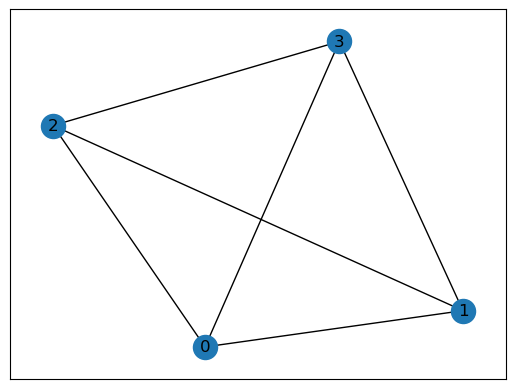

In [ ]:
# Construction of the inter-city graph
G_city = nx.Graph()
G_city.add_nodes_from([0, 1, 2, 3])

# edges"
edges_to_add = {}
for e in G.edges:
  if e[0][:2] != e[1][:2]:
    if not (int(e[0][1:2]), int(e[1][1:2])) in edges_to_add or edges_to_add[(int(e[0][1:2]), int(e[1][1:2]))]['weight'] > G.get_edge_data(e[0], e[1])['weight']:
      edges_to_add[(int(e[0][1:2]), int(e[1][1:2]))] = {'weight': G.get_edge_data(e[0], e[1])['weight'], 'nodes': e}

for k in edges_to_add:
  nodes = list(G_city.nodes())
  G_city.add_edge(*k)
  G_city[k[0]][k[1]]['weight'] = edges_to_add[k]['weight']

pos = nx.spring_layout(G_city, pos=nx.spectral_layout(G_city))
nx.draw_networkx(G_city, pos=pos)

## TSP in Global graph via Quantum

In [ ]:
G_city.nodes 

NodeView((0, 1, 2, 3))

In [ ]:
# run on simulator
node_list, result = run_tsp_on_simulator(add_missing_edges(G_city.copy()))

# get the final route in terms of original nodes
inter_city_route = node_list 
inter_city_route.append(inter_city_route[0])

print("Intercity route : ", inter_city_route)

[]
Problem name: TSP

Minimize
  158.23454986295886*x_0_0*x_1_1 + 158.23454986295886*x_0_0*x_1_3
  + 125.1735986306453*x_0_0*x_2_1 + 125.1735986306453*x_0_0*x_2_3
  + 192.02567232786203*x_0_0*x_3_1 + 192.02567232786203*x_0_0*x_3_3
  + 158.23454986295886*x_0_1*x_1_0 + 158.23454986295886*x_0_1*x_1_2
  + 125.1735986306453*x_0_1*x_2_0 + 125.1735986306453*x_0_1*x_2_2
  + 192.02567232786203*x_0_1*x_3_0 + 192.02567232786203*x_0_1*x_3_2
  + 158.23454986295886*x_0_2*x_1_1 + 158.23454986295886*x_0_2*x_1_3
  + 125.1735986306453*x_0_2*x_2_1 + 125.1735986306453*x_0_2*x_2_3
  + 192.02567232786203*x_0_2*x_3_1 + 192.02567232786203*x_0_2*x_3_3
  + 158.23454986295886*x_0_3*x_1_0 + 158.23454986295886*x_0_3*x_1_2
  + 125.1735986306453*x_0_3*x_2_0 + 125.1735986306453*x_0_3*x_2_2
  + 192.02567232786203*x_0_3*x_3_0 + 192.02567232786203*x_0_3*x_3_2
  + 109.06053102179808*x_1_0*x_2_1 + 109.06053102179808*x_1_0*x_2_3
  + 105.69146989700022*x_1_0*x_3_1 + 105.69146989700022*x_1_0*x_3_3
  + 109.06053102179808*x_1_

## Reconstructing the whole cycle after quantum TSP

In [ ]:
def find_city(G_list, node):
    for i,G in enumerate(G_list):
        if node in list(G.nodes()):
            return i
    return -1

def shift(seq, n):
    return seq[n:]+seq[:n]


def find_neighbours(cycle, node):
        # print(node, cycle)
    index = cycle.index(node)
    n1 = cycle[index-1]
    n2 = cycle[index+1] if index+1 < len(cycle) else cycle[0]

    return n1, n2


def cycle_to_path_cost(G, neighbour, comm_node_1, comm_node_2):
    if (neighbour, comm_node_1) in G.edges():
        return nx.dijkstra_path_length(G, comm_node_2, neighbour) - G[neighbour][comm_node_1]['weight']
    else:
        return nx.dijkstra_path_length(G, comm_node_2, neighbour) - G[comm_node_1][neighbour]['weight']


## Making the whole cycle

In [ ]:
cycle_edges = []

for i in range(len(inter_city_route)-1):
  src_node = min([inter_city_route[i], inter_city_route[i+1]])
  dst_node = max([inter_city_route[i], inter_city_route[i+1]])
  cycle_edges.append(edges_to_add[(src_node, dst_node)]['nodes'])
  if inter_city_route[i] > inter_city_route[i+1]:
    cycle_edges[-1] = cycle_edges[-1][::-1]

In [ ]:
hyper_connected_nodes = []

for i in range(len(cycle_edges)-1):
  hyper_connected_nodes.append([cycle_edges[i][1], cycle_edges[i+1][0]])

hyper_connected_nodes.append([cycle_edges[-1][1], cycle_edges[0][0]])

In [ ]:
print("Cycles are : ", cycles)

Cycles are :  [['G1-6', 'G3-5', 'G0-5', 'G0-1', 'G1-6'], ['G3-7', 'G1-1', 'G3-5', 'G0-5', 'G3-7'], ['G1-6', 'G3-5', 'G0-5', 'G0-1', 'G1-6'], ['G2-4', 'G3-6', 'G2-4']]


In [ ]:
print(hyper_connected_nodes)

[['G2-1', 'G2-4'], ['G3-6', 'G3-3'], ['G1-3', 'G1-5'], ['G0-6', 'G0-1']]


In [ ]:
final_cycle = []

for city_nodes in hyper_connected_nodes:
  final_cycle.append(city_nodes[0])
  aux_cost = []
  city_index = find_city(quantum_subgraphs, city_nodes[0])

  neighbours_1 = (find_neighbours(cycles[city_index], city_nodes[0]))
  print("neighbours1 : ", neighbours_1)
  neighbours_2 = (find_neighbours(cycles[city_index], city_nodes[1]))

  for n in neighbours_1:
    aux_cost.append([cycle_to_path_cost(G, n, city_nodes[0], city_nodes[1]), n, city_nodes[0]])
  
  for n in neighbours_2:
    aux_cost.append([cycle_to_path_cost(G, n, city_nodes[1], city_nodes[0]), n, city_nodes[1]])

  aux_cost.sort()
  if aux_cost[0][2] == city_nodes[0]:
    final_cycle += shift(cycles[city_index], cycles[city_index].index(city_nodes[0]))[1:] + nx.dijkstra_path(G, aux_cost[0][1], city_nodes[1])[1:-1]
  else:
    final_cycle += nx.dijkstra_path(G, city_nodes[0], aux_cost[0][1]) + shift(cycles[city_index], cycles[city_index].index(city_nodes[1]))[::-1][1:-1]
  final_cycle.append(city_nodes[1])
final_cycle.append(final_cycle[0])


ValueError: 'G2-1' is not in list